In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

数据预处理（空缺值、类型转换）

In [2]:
df = pd.read_csv(r"D:\data_py\bankloan_me.csv")

In [3]:
df

,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1.0,NaN,NaN,NaN
1,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0.0,NaN,NaN,NaN
2,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0.0,NaN,NaN,NaN
3,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0.0,NaN,NaN,NaN
4,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns=[ "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"])

In [5]:
df

,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
0,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1.0
1,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0.0
2,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0.0
3,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0.0
4,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1.0
...,...,...,...,...,...,...,...,...
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()  # 剔除包含NA值的行

In [7]:
df

,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
0,41.0,3.0,17.0,176.0,9.3,11.36,5.01,1.0
1,27.0,1.0,10.0,31.0,17.3,1.36,4.00,0.0
2,40.0,1.0,15.0,55.0,5.5,0.86,2.17,0.0
3,41.0,1.0,15.0,120.0,2.9,2.66,0.82,0.0
4,24.0,2.0,2.0,28.0,17.3,1.79,3.06,1.0
...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,27.0,4.6,0.26,0.98,1.0
696,29.0,2.0,6.0,21.0,11.5,0.37,2.05,0.0
697,33.0,1.0,15.0,32.0,7.6,0.49,1.94,0.0
698,45.0,1.0,19.0,77.0,8.4,2.30,4.17,0.0


In [8]:
# 剔除重复值
df = df.drop_duplicates(subset=["年龄", "教育", "工龄", '收入', '负债率', '信用卡负债',  '违约'], keep="first")

年龄、教育、工龄、收入、负债率等变量都是数字型，但它们的类型可能不一定都是float。可能会存在整数型、布尔型、字符串型等不同类型的数据，因此需要进行类型转换，以确保数据的一致性和准确性。

In [9]:
cols = ['年龄', '教育', '工龄', '收入', '负债率', '信用卡负债', '其他负债', '违约']
df[cols] = df[cols].astype(float)

In [10]:
df.describe()

,年龄,教育,工龄,收入,负债率,信用卡负债,其他负债,违约
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,45.601429,10.260571,1.553457,3.058229,0.261429
std,7.997342,0.928206,6.658039,36.814226,6.827234,2.117209,3.287524,0.439727
min,20.000000,1.000000,0.000000,14.000000,0.400000,0.010000,0.050000,0.000000
25%,29.000000,1.000000,3.000000,24.000000,5.000000,0.370000,1.047500,0.000000
50%,34.000000,1.000000,7.000000,34.000000,8.600000,0.855000,1.985000,0.000000
75%,40.000000,2.000000,12.000000,55.000000,14.125000,1.905000,3.927500,1.000000
max,56.000000,5.000000,31.000000,446.000000,41.300000,20.560000,27.030000,1.000000


统计结果：
1.样本人数为700人。
**************************
自变量：贷款人个人信息：
2.平均年龄为34.86岁，标准差为7.99岁，最小值为20岁，最大值为56岁，几乎都处于劳动年龄范围内；
3.教育程度的平均值为1.72，标准差为0.93，表示大多数样本被调查者受过高中教育。
4.工龄的平均值为8.39年，标准差为6.66年，最小值为0年，最大值为31年。
************************
自变量：贷款人经济状况：
5.收入的平均值为45.60千元，标准差为36.81千元，最小值为14千元，最大值为446千元。
6.负债率的平均值为10.26%，标准差为6.83%，最小值为0.4%，最大值为41.3%。
7.信用卡负债的平均值为1.55千元，标准差为2.12千元，最小值为0.01千元，最大值为20.56千元。
******************************
因变量：
违约指标的平均值为0.26，标准差为0.44，最小值为0，最大值为1。
************************
重点分析标准差：
1.年龄和工龄相对较为分散：年龄和工作年限的标准差分别为7.997342和6.658039，说明被调查者的年龄和工龄有较大的差异。年龄和工作年限可能会影响拖欠行为。

2.收入的波动性很大：收入的标准差为36.814226，说明被调查者的收入差异非常大，有些人收入很高，而有些人收入很低。这表明收入是一个重要的指标，与违约行为可能存在着某种关系。

3.负债率、信用卡负债和其他负债的波动性适中：三个负债指标的标准差分别为6.827234、2.117209和3.287524，说明这些指标在样本中的分布较为均匀，整体变化范围不是特别大，因此这些指标都是比较重要的财务状况指标。


可视化分析

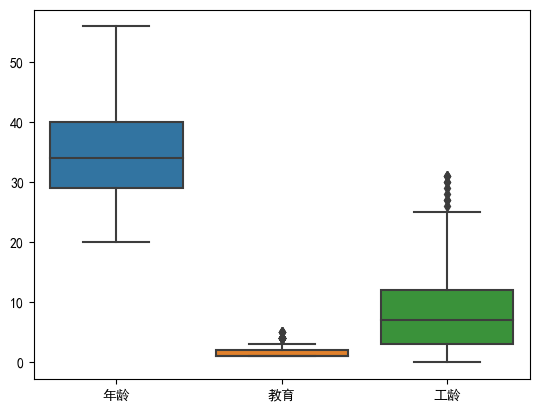

In [11]:
# 绘制箱线图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
sns.boxplot(data=df[['年龄','教育','工龄']])
plt.show()

箱线图：年龄值大部分在35岁左右，教育程度在1~2左右，工龄大部分8~9左右，和之前描述统计结果一致。通过图中可以更加直观的发现年龄和工龄的差距较大，并且教育和工龄都有异常值。
因此接下来考虑是否去除这些异常值。
通过计算教育数据的四分位距（IQR）来确定异常值的上下限。其中四分位距是将教育数据按大小排序并将其分为四个等份，然后计算第一和第三四分位数。上下限被定义为 Q3 + 1.5 * IQR 和 Q1 - 1.5 * IQR，其中Q1和Q3分别为教育数据的25％和75％分位数。异常值是指低于下限或高于上限的任何值。
最后统计结果43个。

In [12]:
# 计算教育的异常值
edu_Q1 = df['教育'].quantile(q=0.25)
edu_Q3 = df['教育'].quantile(q=0.75)
edu_IQR = edu_Q3 - edu_Q1
edu_upbound = edu_Q3 + 1.5 * edu_IQR
edu_downbound = edu_Q1 - 1.5 * edu_IQR
edu_outliers = df[(df['教育'] < edu_downbound) | (df['教育'] > edu_upbound)]
print("教育的异常值：")
print(edu_outliers)

教育的异常值：
       年龄   教育    工龄     收入   负债率  信用卡负债   其他负债   违约
25   25.0  4.0   0.0   32.0  17.6   2.14   3.49  0.0
73   43.0  4.0   1.0   26.0  10.6   1.52   1.24  0.0
83   35.0  4.0   4.0   29.0  11.0   1.84   1.35  0.0
122  34.0  4.0   6.0   27.0  35.3   1.98   7.55  1.0
130  26.0  4.0   1.0   27.0   2.9   0.31   0.47  0.0
146  28.0  4.0   1.0   26.0  12.4   0.38   2.85  0.0
147  30.0  4.0   2.0   25.0  10.0   1.77   0.73  0.0
168  41.0  4.0  14.0   44.0   1.7   0.35   0.39  0.0
184  28.0  4.0   0.0   29.0  24.2   1.42   5.59  0.0
197  33.0  4.0   9.0   28.0   4.3   0.38   0.83  0.0
202  48.0  4.0   3.0   45.0   9.8   0.97   3.44  0.0
219  27.0  4.0   0.0   70.0   8.0   1.62   3.98  1.0
227  40.0  4.0   5.0   75.0   1.9   0.88   0.54  0.0
291  33.0  4.0   9.0   32.0   5.5   0.50   1.26  0.0
314  31.0  4.0   1.0   29.0  11.1   1.07   2.15  0.0
317  23.0  4.0   0.0   23.0   6.7   0.47   1.07  0.0
332  28.0  4.0   2.0   41.0   2.5   0.46   0.57  1.0
333  28.0  4.0   0.0   38.0  10.4   0.

In [13]:
edu_outliers_count = edu_outliers.shape[0]  # 使用shape属性获取行数，即异常值的数量
print("教育的异常值数量：", edu_outliers_count)

教育的异常值数量： 43


In [14]:
#异常值比例很小（如小于5%），则可以考虑保留；如果异常值比例较大（如大于10%），则可能会影响结果的准确性
#但是，这里教育编码是：1：中学以下，2：高中，3：本科，4：研究生，5：博士，所以属于罕见例子，不做处理

In [15]:
# 计算工龄的异常值
work_mean = df['工龄'].mean()
work_std = df['工龄'].std()
work_upbound = work_mean + 3 * work_std
work_downbound = work_mean - 3 * work_std
work_outliers = df[(df['工龄'] < work_downbound) | (df['工龄'] > work_upbound)]
print("工龄的异常值：")
print(work_outliers)

工龄的异常值：
       年龄   教育    工龄     收入   负债率  信用卡负债   其他负债   违约
300  47.0  1.0  29.0  129.0  25.3  20.56  12.08  1.0
528  51.0  2.0  31.0  249.0   7.8   4.27  15.15  0.0
622  48.0  2.0  30.0  148.0   7.2   3.97   6.68  0.0
632  47.0  1.0  31.0  136.0  23.1  14.23  17.18  1.0
675  48.0  1.0  30.0  101.0   6.4   1.87   4.59  0.0
691  47.0  1.0  31.0  253.0   7.2   9.31   8.91  0.0


In [16]:
#只有6个差异值，影响不大，不做处理

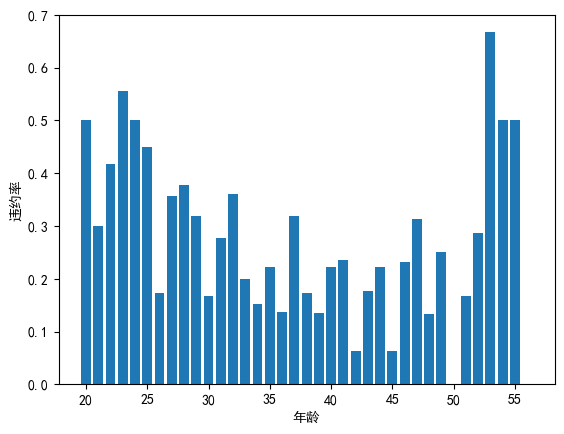

In [17]:
# 按照年龄分组，并计算每个年龄段的违约率
age_groups = df.groupby('年龄')['违约'].mean()

# 绘制条形图
plt.bar(x=age_groups.index, height=age_groups.values)
plt.xlabel('年龄')
plt.ylabel('违约率')
plt.show()


20-25岁和50-55岁年龄组的违约率似乎比其他年龄组要高一些，推测原因：
1.缺乏财务意识：20-25岁的人通常刚刚开始独立生活，他们可能缺乏足够的财务知识和经验来管理自己的财务，导致无法有效地还款。而50-55岁的人则可能由于家庭责任、子女教育等原因，也可能会忽略个人财务规划和管理，从而导致违约。
2.支付能力降低：20-25岁的人通常处于学习阶段或刚刚步入职场，收入相对较低，同时面临着房租、交通、食品、日常开销等支出压力，很难保证还款能力。而50-55岁的人可能已经进入退休或者工资收入减少的状态，在养老金或其他被动收入来源不稳定的情况下，支付能力也可能会降低。
3.生活方式：某些年龄段的人更可能有一种消费倾向，例如在20-25岁的年轻人中，可能存在一种“享受当下”的思想，即通过消费来满足自己的需求，而不考虑未来可能出现的经济压力。50-55岁的人则可能会有一种“补偿式消费”的倾向，即在退休前将生活方式提升到更高的水平，导致消费增加和资金短缺。

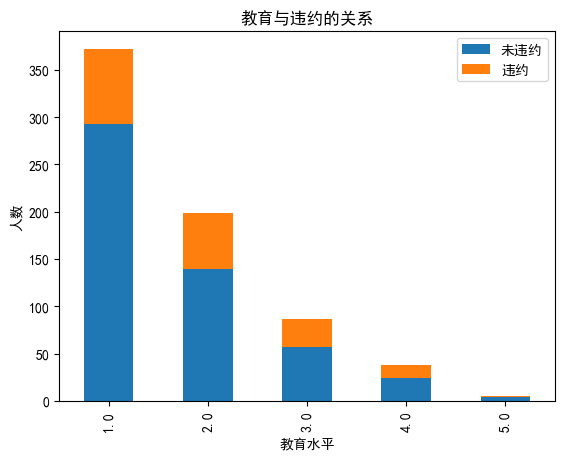

In [18]:

# 按教育水平分组，并计算每种水平的违约人数和非违约人数
education_groups = df.groupby('教育')['违约'].value_counts().unstack()

# 绘制堆积柱状图
education_groups.plot(kind='bar', stacked=True)
plt.xlabel('教育水平')
plt.ylabel('人数')
plt.title('教育与违约的关系')
plt.legend(['未违约', '违约'])
plt.show()

In [19]:
#明显看出，学历越低的人，违约越多，违约占比越高

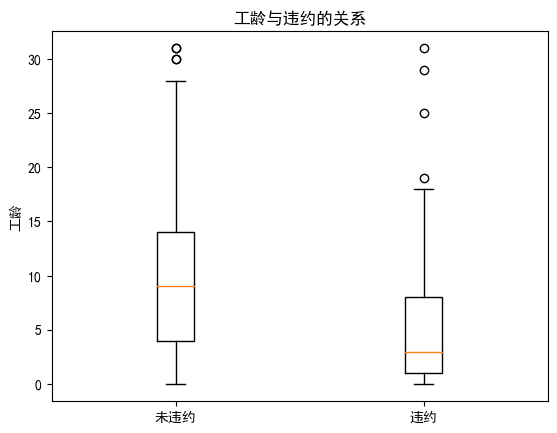

In [20]:
# 绘制箱型图
plt.boxplot([df[df['违约']==0]['工龄'], df[df['违约']==1]['工龄']])
plt.xticks(ticks=[1,2], labels=['未违约', '违约'])
plt.ylabel('工龄')
plt.title('工龄与违约的关系')
plt.show()

In [21]:
#违约的工龄相比未违约的工龄平均较短---负相关

相关性检验--初步检测各因素和违约之间是否存在显著关系——pearson

In [52]:
# 计算 Pearson 相关矩阵
corr_matrix = df[['收入', '负债率', '信用卡负债','年龄', '教育', '工龄', '违约']].corr(method='pearson')

# 打印 Pearson 相关系数
corr_matrix 

,收入,负债率,信用卡负债,年龄,教育,工龄,违约
收入,1.000000,-0.026777,0.570217,0.478710,0.235190,0.619681,-0.070970
负债率,-0.026777,1.000000,0.501732,0.016398,0.008838,-0.031182,0.389575
信用卡负债,0.570217,0.501732,1.000000,0.295137,0.088245,0.403701,0.244739
年龄,0.478710,0.016398,0.295137,1.000000,0.022325,0.536497,-0.137657
教育,0.235190,0.008838,0.088245,0.022325,1.000000,-0.153621,0.114676
工龄,0.619681,-0.031182,0.403701,0.536497,-0.153621,1.000000,-0.282978
违约,-0.070970,0.389575,0.244739,-0.137657,0.114676,-0.282978,1.000000


1.年龄和工龄之间的 Pearson 相关系数为 0.536，说明两个变量之间存在一定程度的正相关关系，即随着年龄的增长，工龄也有相应的增长。
2.年龄和违约率之间的 Pearson 相关系数为 -0.138，表明两个变量之间存在轻微的负相关关系。这意味着随着年龄的增长，违约率可能会略微降低。但是由于相关系数较小，因此这种关系并不显著。
3.工龄和违约率之间的 Pearson 相关系数为 -0.283，表明两个变量之间存在一定程度的负相关关系，即随着工龄的增加，违约率可能会略微降低。

In [23]:
#建立因为我的违约是二元变量，因此建立逻辑回归模型

In [53]:
import statsmodels.formula.api as smf

# 构建二元Logistic回归模型
model = smf.logit('违约 ~ 年龄 + 教育 + 工龄 + 收入 + 负债率 + 信用卡负债', data=df).fit()

# 输出回归结果报告
model.summary()


Optimization terminated successfully.
         Current function value: 0.410159
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     违约   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.2861
Time:                        22:28:23   Log-Likelihood:                -287.11
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 7.144e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9097      0.536     -1.697      0.090      -1.960       0.141
年龄            -0.0094      0.015     -0.629      0.529      -0.039       0.020
教育             0.0585      0.120      0.489      0.625      -0.176       0.293
工龄            -0.2299      0.030     -7.714      0.000      -0.288      -0.171
收入            -0.0052      0.006     -0.878      0.380      -0.017       0.006
负债率            0.0815      0.020      4.164      0.000       0.043       0.120
信用卡负债          0.5528      0.100      5.502      0.000       0.356       0.750
==============================================================================
"""



在分析影响因素时，R平方值不是特别重要，只需要重点分析显著性即可。

H1：年龄对违约率没有显著影响
H2：教育对违约率没有显著影响
H3：工龄对违约率没有显著影响
H4：收入对违约率没有显著影响
H5：负债率对违约率没有显著影响
H6：信用卡负债对违约率没有显著影响


结论：
年龄的系数为-0.0094，p值为0.529，大于0.05的显著性水平，因此接受原假设H1，认为年龄对违约率没有显著影响。
教育的系数为0.0585，p值为0.625，大于0.05的显著性水平，因此接受原假设H2，认为教育对违约率没有显著影响；
收入的系数为-0.0052，p值为0.380，大于0.05的显著性水平，因此接受原假设H3，说明收入对违约率没有显著影响。


工龄的系数为-0.2299，p值小于0.05的显著性水平，可以拒绝原假设，并认为工龄与违约率之间存在显著负相关关系。
因为负债率的系数为0.0815，p值小于0.05的显著性水平，可以拒绝原假设H4，并认为负债率与违约率之间存在显著正相关关系。
信用卡负债对违约率有显著影响。因为信用卡负债的系数为0.5528，p值小于0.05的显著性水平，可以拒绝原假设，并认为信用卡负债与违约率之间存在显著正相关关系。



反思：可视化分析（自变量和因变量之间是线性相关的）结果  VS  回归模型（非线性相关）结果不同

# ***********************************************

第二个问题：收入、负债率、信用卡负债等因素是否能够预测是否会发生违约？

In [25]:
#先检验共线性问题（后续）——>逻辑回归训练

In [54]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 取出自变量和因变量
X = df[['收入', '负债率', '信用卡负债', '年龄', '教育', '工龄']]
y = df['违约']

# 数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 逻辑回归模型
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# 输出
model.summary()


Optimization terminated successfully.
         Current function value: 0.387043
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     违约   No. Observations:                  490
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                            6
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.2800
Time:                        23:19:03   Log-Likelihood:                -189.65
converged:                       True   LL-Null:                       -263.40
Covariance Type:            nonrobust   LLR p-value:                 2.624e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2281      0.651     -1.886      0.059      -2.505       0.048
收入            -0.0031      0.007     -0.418      0.676      -0.018       0.011
负债率            0.0615      0.024      2.544      0.011       0.014       0.109
信用卡负债          0.5760      0.120      4.815      0.000       0.342       0.811
年龄            -0.0009      0.017     -0.050      0.960      -0.035       0.033
教育             0.0529      0.143      0.370      0.711      -0.227       0.333
工龄            -0.2475      0.038     -6.473      0.000      -0.322      -0.173
==============================================================================
"""

根据该输出，这是一个逻辑回归模型的拟合结果。我们可以得到以下结论：

模型的似然函数值为0.433986，表示拟合程度较好。（在逻辑回归中，似然函数（likelihood function）是一种衡量模型拟合程度的方法。似然函数的值越大，说明模型与数据之间的契合度越好，也就是说模型能够较好地解释观测到的数据。而似然函数值越小，则说明模型与数据之间的差异越大。

对于逻辑回归模型而言，似然函数表示模型参数在给定样本下的条件概率分布。MLE（maximum likelihood estimation）方法通过最大化似然函数来估计模型参数，使得所得到的样本数据出现的概率最大。因此，在逻辑回归中，似然函数值越大，说明模型与数据之间的契合度越好，模型的预测能力也就越强。

在该输出中，我们可以看到模型的似然函数值为0.433986，这个数值虽然不是非常高，但是已经表明了该模型能够较好地解释数据，其拟合程度较好，同时也说明该模型有一定的预测能力。）

收入、年龄和教育等变量的系数不显著，说明它们对于判断是否违约的影响较小；而负债率、信用卡负债和工龄等变量的系数显著，说明它们对于判断是否违约的影响较大。
需要注意的是，由于该模型使用了MLE（maximum likelihood estimation）方法进行参数估计，

输出分类报告和混淆矩阵是用来评估模型性能的重要步骤，其可以帮助我们更直观地了解模型在测试集上的预测效果，以及模型对于不同类别样本的识别能力。

首先，分类报告能够给出模型的精度、召回率和F1分数等指标，从多个角度综合评估模型的表现。这些指标可以告诉我们模型的整体性能如何，并且能够帮助我们判断模型在预测哪个类别时出现了问题。比如，在该输出中，分类报告显示模型对于“违约”类别的预测效果较差，其精度只有0.32，召回率也只有0.26，F1-score值为0.29，这说明模型存在较高的假负例率，即将实际上应该预测为“违约”的样本错误地预测为“未违约”。

其次，混淆矩阵则进一步展示了模型在测试集上的预测效果，可以帮助我们计算模型的准确率、误差率、精度、召回率等指标，从而更加详细地了解模型的预测效果和错误类型。比如，在该输出中，混淆矩阵显示模型将138个样本正确预测为“未违约”，25个样本错误预测为“未违约”，35个样本错误预测为“违约”，12个样本正确预测为“违约”。这也进一步印证了分类报告中的结论，即模型在预测“违约”类别时存在较高的假负例率。

通过输出分类报告和混淆矩阵，我们可以更加客观地评估模型的性能、了解其在测试集上的表现，并针对其存在的问题进行调整和优化，以提升模型的预测效果和泛化能力。

对于类别0（没有违约），模型具有较高的精度和召回率，说明模型能够准确地预测哪些客户不会违约。对于类别1（有违约），模型的召回率较低，但精度较高，说明模型可以较好地区分出真正会违约的客户。总体来说，模型具有良好的平衡性，可以有效地预测违约率



考虑是不是存在多重共线性问题，要删除一个自变量

In [36]:
# 删除"违约"和"其他负债"列
X = df.drop(["违约", "其他负债"], axis=1)

# 计算自变量之间的相关性
corr_matrix = X.corr()


In [37]:
corr_matrix

,年龄,教育,工龄,收入,负债率,信用卡负债
年龄,1.000000,0.022325,0.536497,0.478710,0.016398,0.295137
教育,0.022325,1.000000,-0.153621,0.235190,0.008838,0.088245
工龄,0.536497,-0.153621,1.000000,0.619681,-0.031182,0.403701
收入,0.478710,0.235190,0.619681,1.000000,-0.026777,0.570217
负债率,0.016398,0.008838,-0.031182,-0.026777,1.000000,0.501732
信用卡负债,0.295137,0.088245,0.403701,0.570217,0.501732,1.000000


In [73]:
X_pca = PCA(n_components=4).fit_transform(X)
X_pca

array([[130.68755028,   9.55288106,   2.57055808,   2.30350604],
       [-15.11891543,   2.97096388,   7.36972539,  -5.89666815],
       [ 10.57905132,  -4.90295876,  -6.00922657,  -3.12522492],
       ...,
       [-12.8989591 ,  -2.31102057,  -3.63527381,  -7.46723379],
       [ 33.32107415,  -8.38093307,  -3.56006851,  -3.52140194],
       [ -0.91827159,  -4.43276593,   3.7189276 ,  -2.7513294 ]])

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, df["违约"], test_size=0.2, random_state=42)

# 训练逻辑回归模型
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

In [77]:
accuracy 

0.8285714285714286

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

# 使用模型进行预测
y_pred = clf.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# 输出分类报告和混淆矩阵
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       102
         1.0       0.85      0.45      0.59        38

    accuracy                           0.83       140
   macro avg       0.84      0.71      0.74       140
weighted avg       0.83      0.83      0.81       140

[[99  3]
 [21 17]]


2.模型构建——多元线性回归,但是我的因变量是二元变量（0/1）所以应该采用逻辑回归

In [29]:
# 计算协方差矩阵
cov_matrix = np.cov(X.T)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 查看特征值
print("Eigenvalues:", eigenvalues)

Eigenvalues: [1356.78015455    1.77651136   47.82429258]


列的第二个因素“负债率” 1.77651136 ：存在多重共线性，删除怕导致模型性能下降，采用PCA降维

In [30]:
from sklearn.decomposition import PCA

# 实例化PCA模型，选择降维后的主成分数
pca = PCA(n_components=2)

# 对自变量矩阵X进行PCA降维处理
X_pca = pca.fit_transform(X)

# 查看降维后的结果
print("PCA transformed variables:\n", X_pca)

PCA transformed variables:
 [[130.65333848   0.59872293]
 [-14.63459406   6.91919964]
 [  9.39420837  -4.81463184]
 ...
 [-13.61566168  -2.79227069]
 [ 31.41498648  -1.72857288]
 [ -1.57538251   4.61610158]]


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 将自变量矩阵X_pca和目标变量y划分为训练集0.3和测试集0.7
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 实例化线性回归模型
model = LinearRegression()

# 训练模型并进行预测
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 评估模型性能
score = model.score(X_test, y_test) # R^2得分

In [32]:
score

0.21154026731850972

In [33]:
#拟合的还是不好

In [34]:
#Logistic模型预测？